In [1]:
# Install third-party PCA library (run once)
!pip install pca
!pip install plotly


   ---------------- ----------------------- 2/5 [adjusttext]
   ---------------------------------------- 5/5 [pca]



In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
from pca import pca
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [3]:
# Load happiness dataset using relative path
df = pd.read_csv("../datasets/happy.csv")

## Display first, last and a random sample

In [4]:
# Show the first rows
display(df.head())

# Show the last rows
display(df.tail())

# Show a random sample of 5 rows
display(df.sample(5))

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.632,1.305,1.592,0.874,0.681,0.202,0.393
1,2,Norway,7.594,1.456,1.582,0.861,0.686,0.286,0.340
2,3,Denmark,7.555,1.351,1.590,0.868,0.683,0.284,0.408
3,4,Iceland,7.495,1.343,1.644,0.914,0.677,0.353,0.138
4,5,Switzerland,7.487,1.420,1.549,0.927,0.660,0.256,0.357


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
151,152,Yemen,3.355,0.442,1.073,0.343,0.244,0.083,0.064
152,153,Tanzania,3.303,0.455,0.991,0.381,0.481,0.270,0.097
153,154,South Sudan,3.254,0.337,0.608,0.177,0.112,0.224,0.106
154,155,Central African Republic,3.083,0.024,0.000,0.010,0.305,0.218,0.038
155,156,Burundi,2.905,0.091,0.627,0.145,0.065,0.149,0.076


,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
65,66,Kosovo,5.662,0.855,1.230,0.578,0.448,0.274,0.023
127,128,Georgia,4.340,0.853,0.592,0.643,0.375,0.038,0.215
143,144,Zimbabwe,3.692,0.357,1.094,0.248,0.406,0.132,0.099
29,30,Guatemala,6.382,0.781,1.268,0.608,0.604,0.179,0.071
108,109,Senegal,4.631,0.429,1.117,0.433,0.406,0.138,0.082


In [5]:
# Overview of column data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


#### Basic Statistics about data 

In [6]:
display(df.describe(include='all'))

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
unique,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Finland,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,78.500000,NaN,5.375917,0.891449,1.213237,0.597346,0.454506,0.181006,0.112449
std,45.177428,NaN,1.119506,0.391921,0.302372,0.247579,0.162424,0.098471,0.096343
min,1.000000,NaN,2.905000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,NaN,4.453750,0.616250,1.066750,0.422250,0.356000,0.109500,0.051000
50%,78.500000,NaN,5.378000,0.949500,1.255000,0.644000,0.487000,0.174000,0.082000
75%,117.250000,NaN,6.168500,1.197750,1.463000,0.777250,0.578500,0.239000,0.139000


In [7]:
df.isna().sum()

Overall rank                    0
Country or region               0
Score                           0
GDP per capita                  0
Social support                  0
Healthy life expectancy         0
Freedom to make life choices    0
Generosity                      0
Perceptions of corruption       0
dtype: int64

### PCA performed

[05-01-2026 16:34:32] [pca.pca] [INFO] Row labels are auto-completed.
[05-01-2026 16:34:32] [pca.pca] [INFO] The PCA reduction is performed on 6 variables (columns) of the input dataframe.


[05-01-2026 16:34:32] [pca.pca] [INFO] Fit using PCA.
[05-01-2026 16:34:32] [pca.pca] [INFO] Compute loadings and PCs.
[05-01-2026 16:34:32] [pca.pca] [INFO] Compute explained variance.
[05-01-2026 16:34:32] [pca.pca] [INFO] Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[05-01-2026 16:34:32] [pca.pca] [INFO] Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[05-01-2026 16:34:32] [pca.pca] [INFO] Outlier detection using SPE/DmodX with n_std=[3]
[05-01-2026 16:34:32] [pca.pca] [INFO] Plot PC1 vs PC2 with loadings.
[05-01-2026 16:34:32] [scatterd.scatterd] [INFO] Create scatterplot


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': 'The top 5 Principal Component(s) explains [97.43%] of the variance.'}, xlabel='PC1 (48.8% expl.var)', ylabel='PC2 (23.2% expl.var)'>)

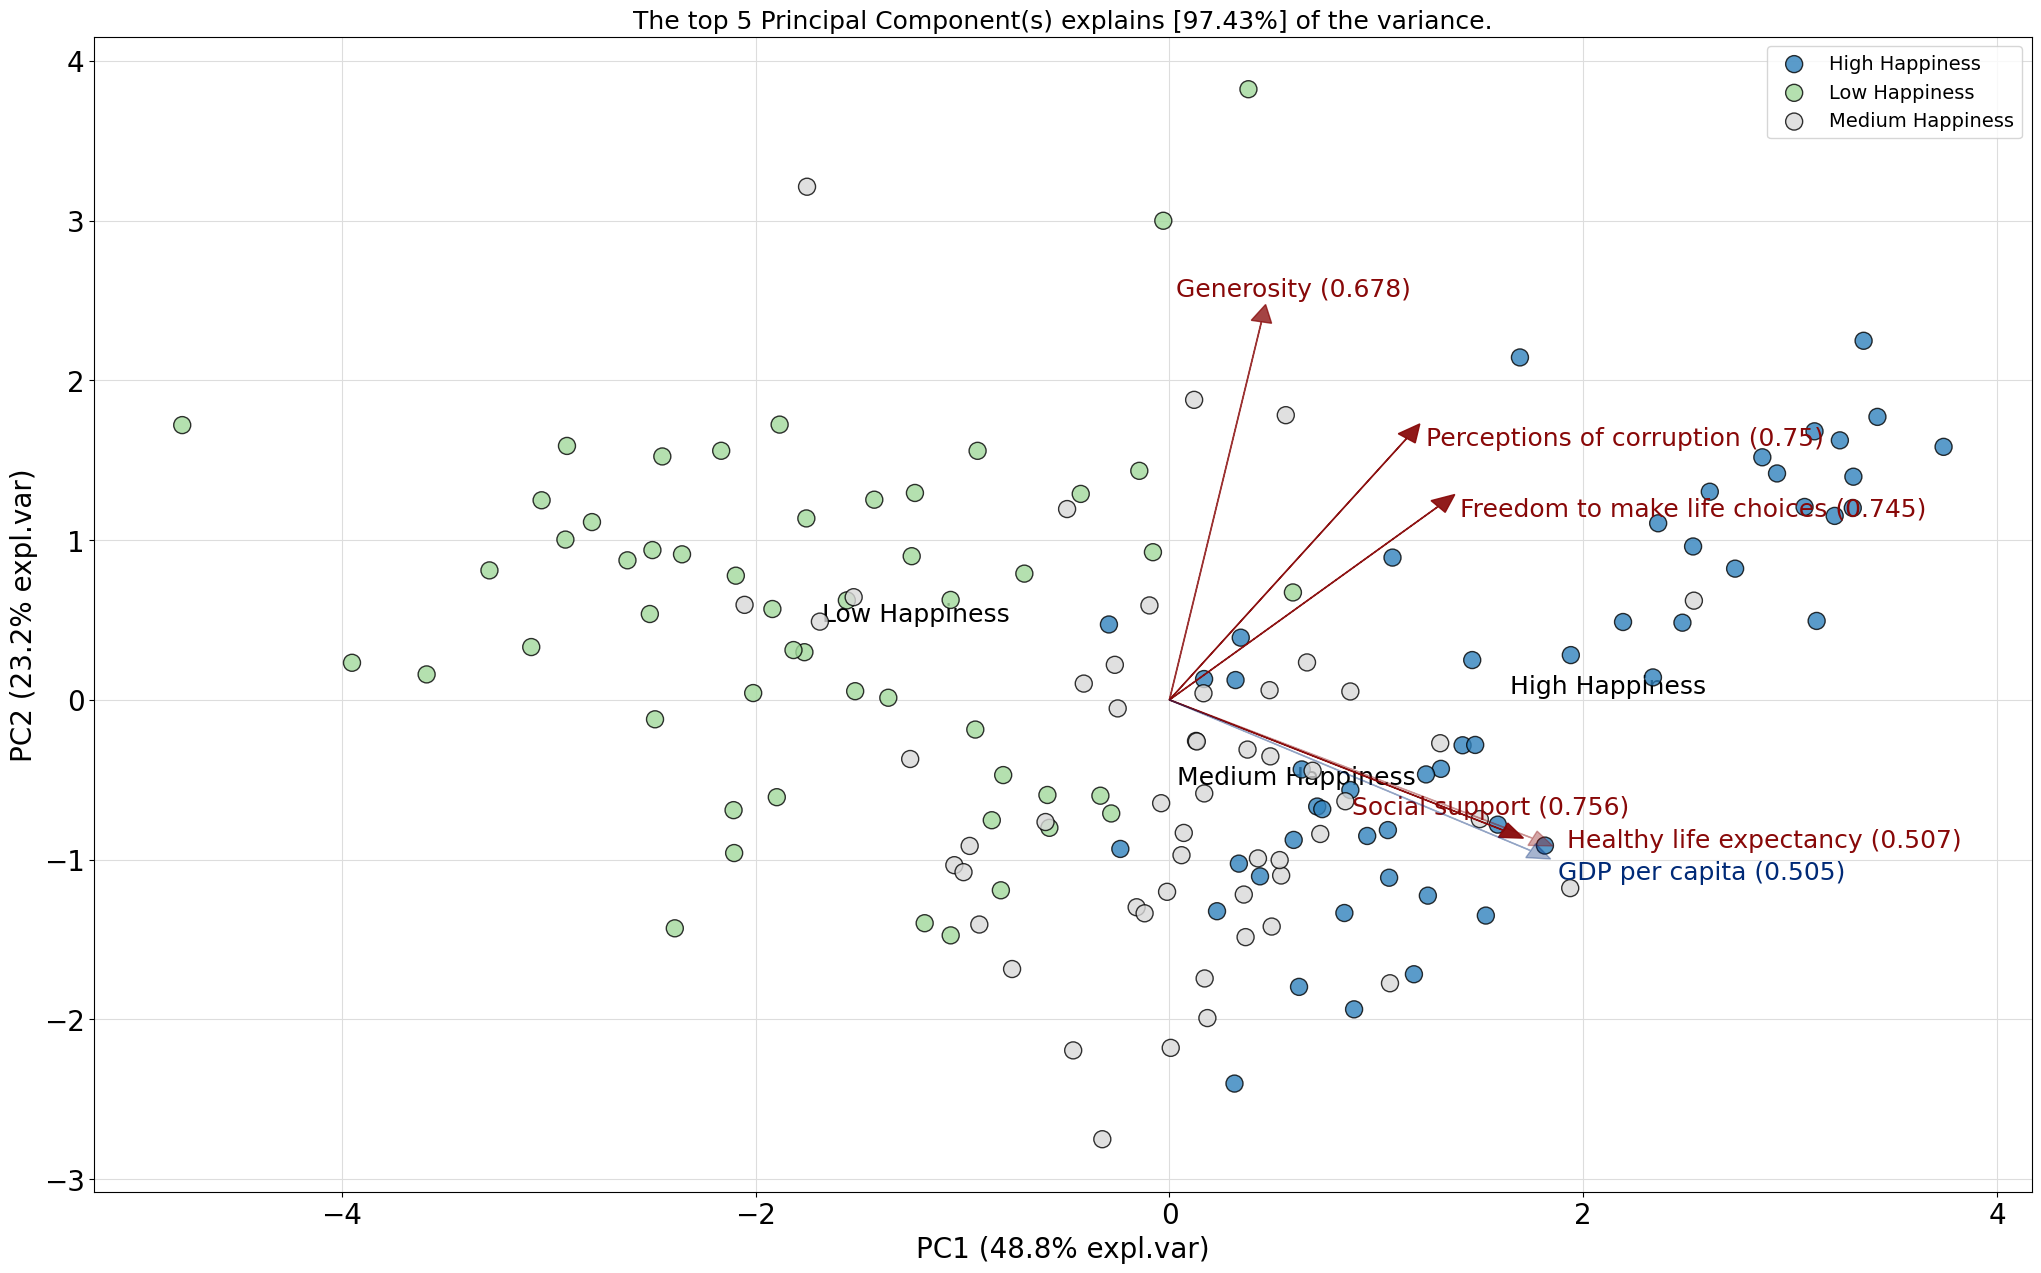

In [8]:
df1 = df.copy()
# This creates 3 groups: High, Medium, and Low happiness
y_categories = pd.qcut(df1["Score"], q=3, labels=["Low Happiness", "Medium Happiness", "High Happiness"])

# 2. Prepare X (excluding non-features)
X = df1.drop(columns=["Country or region", "Overall rank", "Score"], errors="ignore")
labels = X.columns

# 3. Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Initialize and Fit
model = pca(n_components=5) 
results = model.fit_transform(X_scaled, col_labels=labels)

# 5. Biplot using the CATEGORIES for coloring
model.biplot(labels=y_categories, legend=True)

In [9]:
model.results['topfeat']

,PC,feature,loading,type
0,PC1,Healthy life expectancy,0.507478,best
1,PC2,Generosity,0.677582,best
2,PC3,Freedom to make life choices,0.744680,best
3,PC4,Perceptions of corruption,0.749989,best
4,PC5,Social support,0.756395,best
5,PC1,GDP per capita,0.504522,weak


In [10]:
print(results['variance_ratio'])

[0.48857775 0.23297143 0.09951662 0.09819496 0.05505599]


In [11]:
print(model.results['explained_var'])

[0.48857775 0.72154919 0.82106581 0.91926077 0.97431676]


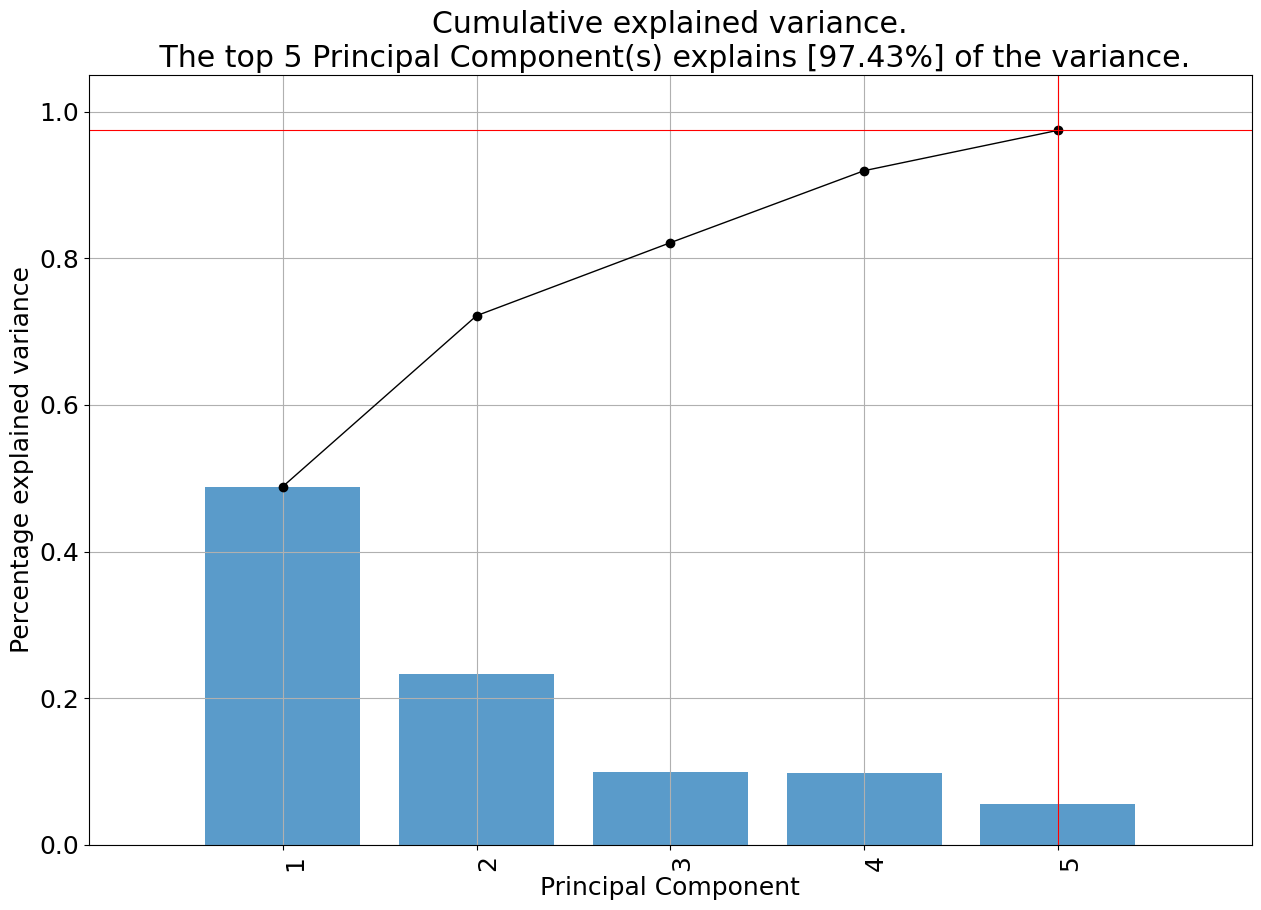

In [12]:
model.plot();

In [13]:
# 1. Run KMeans
pca_data = results['PC'].iloc[:, :2] 
kmeans = KMeans(n_clusters=3, random_state=42).fit(pca_data)

# 2. Map the numbers to names
# We create a dictionary to define which number corresponds to which label
cluster_map = {0: "Medium Happiness", 1: "Low Happiness", 2: "High Happiness"}

# 3. Apply the map to a new column
df1['Happiness_Level'] = kmeans.labels_
df1['Happiness_Level'] = df1['Happiness_Level'].map(cluster_map)

# 4. Plot using the new named column
fig = px.scatter(pca_data, x='PC1', y='PC2', 
                 color=df1['Happiness_Level'], # Use the names here
                 hover_name=df1['Country or region'],
                 color_discrete_map={
                     "High Happiness": "green",
                     "Medium Happiness": "orange",
                     "Low Happiness": "red"
                 },
                 title="World Happiness Clusters")

fig.show()

c:\Users\Daniel3\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


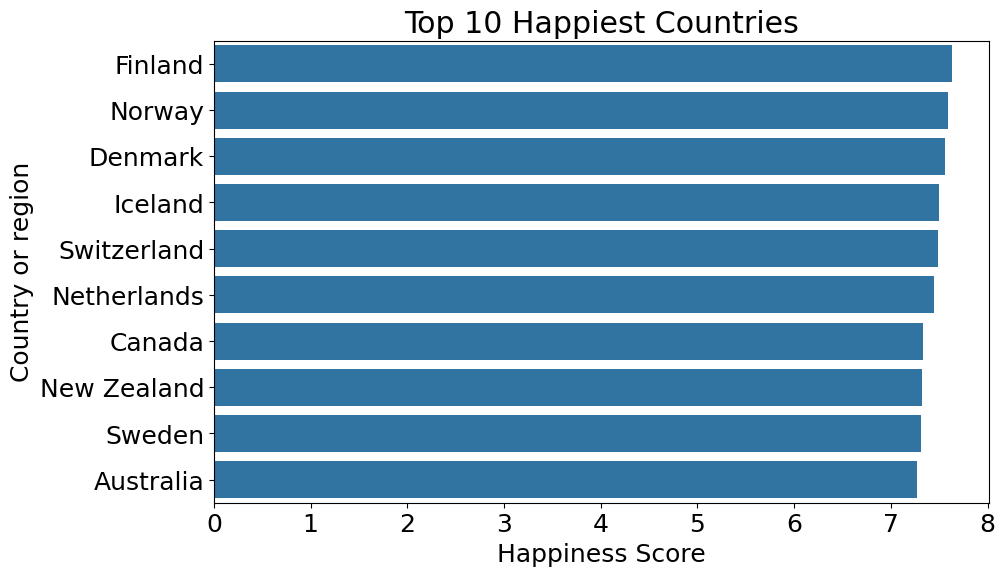

In [14]:
# Overall happiness score by country top 10
top_10 = df[['Country or region', 'Score']].sort_values(by='Score', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(data=top_10, x='Score', y='Country or region')
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country or region')
plt.show()

In [15]:
# 1. Create the map
fig = px.choropleth(df1, 
                    locations="Country or region", 
                    locationmode='country names',
                    color="Happiness_Level", # This is the column we mapped earlier
                    hover_name="Country or region",
                    # Optionally, add the raw score to the hover data
                    hover_data=["Score"],
                    title="Global Happiness Clusters (Based on PCA Analysis)",
                    color_discrete_map={
                        "High Happiness": "#00CC96",   # Green
                        "Medium Happiness": "#EF553B", # Orange
                        "Low Happiness": "#AB63FA"     # Purple
                    },
                    projection="natural earth") # A clean, modern map look

# 2. Update layout for a cleaner look
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})
fig.show()

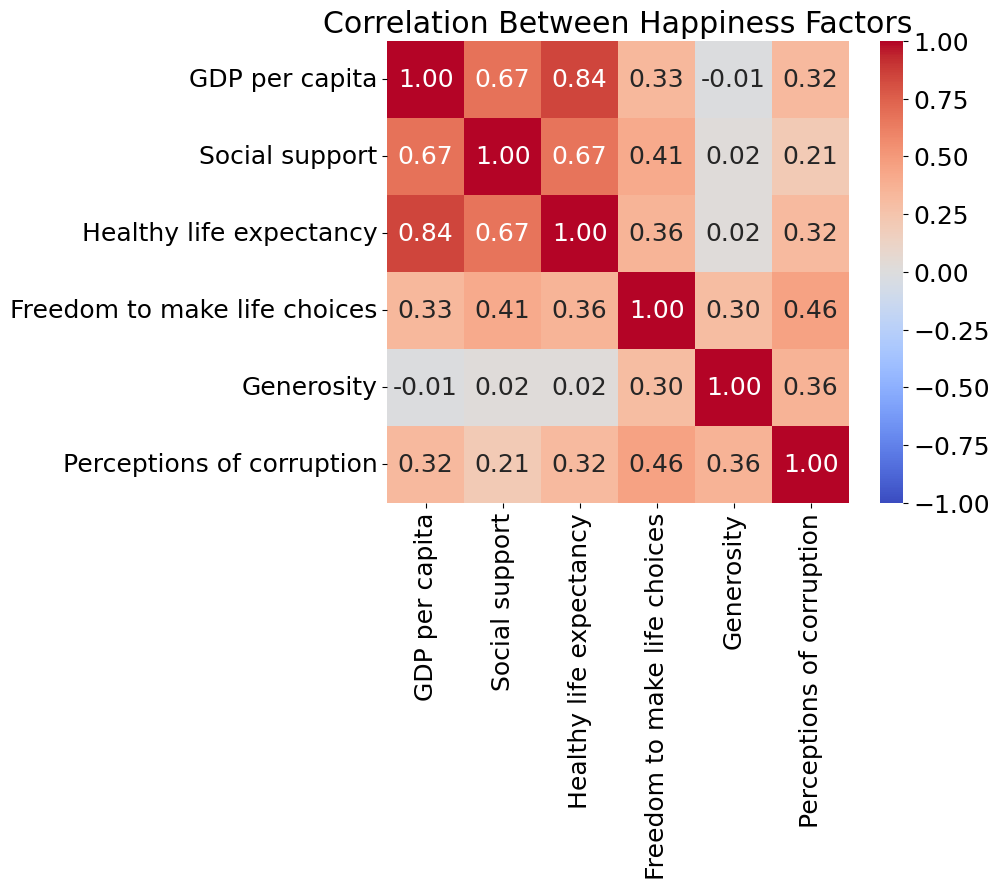

In [16]:
# Define the default factor columns to compare (exclude non-feature columns)
factor_cols = [
    'GDP per capita',
    'Social support',
    'Healthy life expectancy',
    'Freedom to make life choices',
    'Generosity',
    'Perceptions of corruption'
]
# Compute correlation matrix and plot heatmap
corr = df1[factor_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    square=True
)
plt.title("Correlation Between Happiness Factors")
plt.show()


## Fill out report

In [17]:
# Create dataset structure table
structure_table = pd.DataFrame({
    "Feature / Variable": df.columns,
    "Data type": df.dtypes.astype(str),
    "Number of unique values": [df[col].nunique() for col in df.columns],
    "Example values": [df[col].dropna().unique()[:3].tolist() for col in df.columns]
})

structure_table


,Feature / Variable,Data type,Number of unique values,Example values
Overall rank,Overall rank,int64,156,"[1, 2, 3]"
Country or region,Country or region,object,156,"[Finland, Norway, Denmark]"
Score,Score,float64,154,"[7.632, 7.594, 7.555]"
GDP per capita,GDP per capita,float64,147,"[1.305, 1.456, 1.351]"
Social support,Social support,float64,146,"[1.592, 1.582, 1.59]"
Healthy life expectancy,Healthy life expectancy,float64,143,"[0.874, 0.861, 0.868]"
Freedom to make life choices,Freedom to make life choices,float64,136,"[0.681, 0.686, 0.683]"
Generosity,Generosity,float64,122,"[0.202, 0.286, 0.284]"
Perceptions of corruption,Perceptions of corruption,float64,111,"[0.393, 0.34, 0.408]"


In [18]:
# Select numeric variables only
numeric_df = df.select_dtypes(include="number")

# Basic descriptive statistics
desc = numeric_df.describe().T

# Add variance column
desc["Variance"] = numeric_df.var()

# Optional: reset index to have variable names as a column
desc = desc.reset_index().rename(columns={"index": "Variable"})

desc


,Variable,count,mean,std,min,25%,50%,75%,max,Variance
0,Overall rank,156.0,78.500000,45.177428,1.000,39.75000,78.5000,117.25000,156.000,2041.000000
1,Score,156.0,5.375917,1.119506,2.905,4.45375,5.3780,6.16850,7.632,1.253293
2,GDP per capita,156.0,0.891449,0.391921,0.000,0.61625,0.9495,1.19775,2.096,0.153602
3,Social support,156.0,1.213237,0.302372,0.000,1.06675,1.2550,1.46300,1.644,0.091429
4,Healthy life expectancy,156.0,0.597346,0.247579,0.000,0.42225,0.6440,0.77725,1.030,0.061295
5,Freedom to make life choices,156.0,0.454506,0.162424,0.000,0.35600,0.4870,0.57850,0.724,0.026382
6,Generosity,156.0,0.181006,0.098471,0.000,0.10950,0.1740,0.23900,0.598,0.009696
7,Perceptions of corruption,156.0,0.112449,0.096343,0.000,0.05100,0.0820,0.13900,0.457,0.009282
